#### Exploring other parameters beyond structure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os


In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
df  = pd.read_csv(interim_dir+'df3.csv')

In [10]:
df

,Unnamed: 0,dtxsid,class,subclass,Y_pred_aim,Diff_aim,aim_list,Y_true,Y_pred_tox,Diff_tox,tox_list
0,0,DTXSID5020281,benzene and substituted derivatives,nitrobenzenes,-0.329968,0.135371,"['Aromatic Carbon', ' CL [chlorine, aromatic a...",-0.465339,-0.346871,0.118469,"['bond:CX_halide_aromatic-X_generic', 'bond:N(..."
1,1,DTXSID8020961,benzene and substituted derivatives,nitrobenzenes,-0.842910,0.108124,"['Aromatic Carbon', ' N [aliphatic N, one arom...",-0.734786,-0.838397,0.103611,"['bond:CN_amine_aromatic_generic', 'bond:CN_am..."
2,2,DTXSID0021834,phenols,nitrophenols,-0.569759,0.482668,"['Aromatic Carbon', ' OH [hydroxy, aromatic at...",-0.087091,-0.020099,0.066992,"['bond:COH_alcohol_aromatic', 'bond:COH_alcoho..."
3,3,DTXSID2044347,organooxygen compounds,carbonyl compounds,-1.143505,0.084580,"[' CH3 [aliphatic carbon]', 'Aromatic Carbon',...",-1.058925,-1.077005,0.018080,"['bond:C=O_carbonyl_ab-unsaturated_generic', '..."
4,4,DTXSID4025745,benzene and substituted derivatives,nitrobenzenes,-0.786114,0.236858,"[' CH2 [aliphatic carbon]', ' CL [chlorine, al...",-1.022972,-0.927933,0.095039,"['bond:CX_halide_alkyl-X_aromatic_alkane', 'bo..."
...,...,...,...,...,...,...,...,...,...,...,...
6923,6923,DTXSID3044752,fatty acyls,fatty acid esters,-0.580946,0.396529,"[' CH2 [aliphatic carbon]', '=CH2 [olefinic ca...",-0.184418,-1.149901,0.965483,"['bond:C(=O)O_carboxylicEster_acyclic', 'bond:..."
6924,6924,DTXSID80244288,organothiophosphorus compounds,NaN,0.015562,1.927141,"[' CH3 [aliphatic carbon]', ' CH2 [aliphatic c...",1.942702,0.940935,1.001768,"['bond:CS_sulfide', 'bond:PC_phosphorus_organo..."
6925,6925,DTXSID0022143,carboxylic acids and derivatives,acrylic acids and derivatives,-1.318011,1.034492,"[' CH3 [aliphatic carbon]', ' CH2 [aliphatic c...",-0.283519,-0.625075,0.341556,"['bond:C(=O)O_carboxylicEster_acyclic', 'bond:..."
6926,6926,DTXSID6020303,organonitrogen compounds,quaternary ammonium salts,-0.640617,0.061316,"[' CH3 [aliphatic carbon]', ' CH2 [aliphatic c...",-0.579302,-0.190255,0.389047,"['bond:CX_halide_alkyl-Cl_ethyl', 'bond:CX_hal..."


In [5]:
CMO = pd.concat([pd.read_excel(raw_dir+'smi_acute.xlsx', sheet_name = 'first'), pd.read_excel(raw_dir+'smi_acute.xlsx', sheet_name = 'last')], axis =0).drop(['INPUT','FOUND_BY'],axis=1)

In [6]:
CMO

,DTXSID,PREFERRED_NAME,SMILES,QSAR_READY_SMILES
0,DTXSID5020281,1-Chloro-4-nitrobenzene,[O-][N+](=O)C1=CC=C(Cl)C=C1,[O-][N+](=O)C1=CC=C(Cl)C=C1
1,DTXSID8020961,4-Nitroaniline,NC1=CC=C(C=C1)[N+]([O-])=O,NC1=CC=C(C=C1)[N+]([O-])=O
2,DTXSID0021834,4-Nitrophenol,OC1=CC=C(C=C1)[N+]([O-])=O,OC1=CC=C(C=C1)[N+]([O-])=O
3,DTXSID2044347,4'-Methoxyacetophenone,COC1=CC=C(C=C1)C(C)=O,COC1=CC=C(C=C1)C(C)=O
4,DTXSID4025745,4-Nitrobenzyl chloride,[O-][N+](=O)C1=CC=C(CCl)C=C1,[O-][N+](=O)C1=CC=C(CCl)C=C1
...,...,...,...,...
2008,DTXSID3044752,Diprop-2-en-1-yl (2Z)-but-2-enedioate,C=CCOC(=O)\C=C/C(=O)OCC=C,C=CCOC(=O)C=CC(=O)OCC=C
2009,DTXSID80244288,"Phosphonodithious acid, methyl-, dipropyl ester",CCCSP(C)SCCC,CCCSP(C)SCCC
2010,DTXSID0022143,2-Hydroxypropyl acrylate,CC(O)COC(=O)C=C,CC(O)COC(=O)C=C
2011,DTXSID6020303,Chlormequat chloride,[Cl-].C[N+](C)(C)CCCl,C[N+](C)(C)CCCl


In [11]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [14]:
df1 = pd.merge(df, CMO, left_on = 'dtxsid', right_on = 'DTXSID', how = 'left')

In [24]:
df2 = df1[df1['QSAR_READY_SMILES'].notnull()]

In [26]:
df2 = df2.set_index('dtxsid')

In [51]:
df2

,class,subclass,Y_pred_aim,Diff_aim,aim_list,Y_true,Y_pred_tox,Diff_tox,tox_list,DTXSID,PREFERRED_NAME,SMILES,QSAR_READY_SMILES
dtxsid,,,,,,,,,,,,,
DTXSID5020281,benzene and substituted derivatives,nitrobenzenes,-0.329968,0.135371,"['Aromatic Carbon', ' CL [chlorine, aromatic a...",-0.465339,-0.346871,0.118469,"['bond:CX_halide_aromatic-X_generic', 'bond:N(...",DTXSID5020281,1-Chloro-4-nitrobenzene,[O-][N+](=O)C1=CC=C(Cl)C=C1,[O-][N+](=O)C1=CC=C(Cl)C=C1
DTXSID8020961,benzene and substituted derivatives,nitrobenzenes,-0.842910,0.108124,"['Aromatic Carbon', ' N [aliphatic N, one arom...",-0.734786,-0.838397,0.103611,"['bond:CN_amine_aromatic_generic', 'bond:CN_am...",DTXSID8020961,4-Nitroaniline,NC1=CC=C(C=C1)[N+]([O-])=O,NC1=CC=C(C=C1)[N+]([O-])=O
DTXSID0021834,phenols,nitrophenols,-0.569759,0.482668,"['Aromatic Carbon', ' OH [hydroxy, aromatic at...",-0.087091,-0.020099,0.066992,"['bond:COH_alcohol_aromatic', 'bond:COH_alcoho...",DTXSID0021834,4-Nitrophenol,OC1=CC=C(C=C1)[N+]([O-])=O,OC1=CC=C(C=C1)[N+]([O-])=O
DTXSID2044347,organooxygen compounds,carbonyl compounds,-1.143505,0.084580,"[' CH3 [aliphatic carbon]', 'Aromatic Carbon',...",-1.058925,-1.077005,0.018080,"['bond:C=O_carbonyl_ab-unsaturated_generic', '...",DTXSID2044347,4'-Methoxyacetophenone,COC1=CC=C(C=C1)C(C)=O,COC1=CC=C(C=C1)C(C)=O
DTXSID4025745,benzene and substituted derivatives,nitrobenzenes,-0.786114,0.236858,"[' CH2 [aliphatic carbon]', ' CL [chlorine, al...",-1.022972,-0.927933,0.095039,"['bond:CX_halide_alkyl-X_aromatic_alkane', 'bo...",DTXSID4025745,4-Nitrobenzyl chloride,[O-][N+](=O)C1=CC=C(CCl)C=C1,[O-][N+](=O)C1=CC=C(CCl)C=C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID3044752,fatty acyls,fatty acid esters,-0.580946,0.396529,"[' CH2 [aliphatic carbon]', '=CH2 [olefinic ca...",-0.184418,-1.149901,0.965483,"['bond:C(=O)O_carboxylicEster_acyclic', 'bond:...",DTXSID3044752,Diprop-2-en-1-yl (2Z)-but-2-enedioate,C=CCOC(=O)\C=C/C(=O)OCC=C,C=CCOC(=O)C=CC(=O)OCC=C
DTXSID80244288,organothiophosphorus compounds,NaN,0.015562,1.927141,"[' CH3 [aliphatic carbon]', ' CH2 [aliphatic c...",1.942702,0.940935,1.001768,"['bond:CS_sulfide', 'bond:PC_phosphorus_organo...",DTXSID80244288,"Phosphonodithious acid, methyl-, dipropyl ester",CCCSP(C)SCCC,CCCSP(C)SCCC
DTXSID0022143,carboxylic acids and derivatives,acrylic acids and derivatives,-1.318011,1.034492,"[' CH3 [aliphatic carbon]', ' CH2 [aliphatic c...",-0.283519,-0.625075,0.341556,"['bond:C(=O)O_carboxylicEster_acyclic', 'bond:...",DTXSID0022143,2-Hydroxypropyl acrylate,CC(O)COC(=O)C=C,CC(O)COC(=O)C=C


In [17]:
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import Descriptors
from rdkit import Chem

In [18]:
def calc_descriptors_from_smi(smi):
    """
    Encode a molecule from a RDKit Mol into a set of descriptors.

    Parameters
    ----------
    mol : RDKit Mol
        The RDKit molecule.

    Returns
    -------
    list
        The set of chemical descriptors as a list.

    """
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([desc[0] for desc in Descriptors.descList])
    return list(calc.CalcDescriptors(Chem.MolFromSmiles(smi)))

In [37]:
#Descriptors.descList

In [40]:
def calc_descriptors_from_smi2(smi):
    
    return Descriptors.MolLogP(Chem.MolFromSmiles(smi)), Descriptors.MolWt(Chem.MolFromSmiles(smi))

In [41]:
from rdkit.Chem import Descriptors


In [43]:
desc_list = []

for mol in df2['QSAR_READY_SMILES'].tolist():
    desc = calc_descriptors_from_smi2(mol)
    desc_list.append(desc)



In [47]:
df3 = pd.DataFrame(desc_list)
df3.index = df2.index

In [49]:
df3.columns = ['LogP', 'MW']

In [50]:
df3

,LogP,MW
dtxsid,,
DTXSID5020281,2.2482,157.556
DTXSID8020961,1.1770,138.126
DTXSID0021834,1.3004,139.110
DTXSID2044347,1.8978,150.177
DTXSID4025745,2.3336,171.583
...,...,...
DTXSID3044752,1.0010,196.202
DTXSID80244288,4.2145,196.321
DTXSID0022143,0.0964,130.143


In [53]:
df4 = pd.concat([df2, df3], axis = 1)

(array([1., 2., 0., 0., 4., 5., 4., 8., 1., 2.]),
 array([0.0878 , 0.52568, 0.96356, 1.40144, 1.83932, 2.2772 , 2.71508,
        3.15296, 3.59084, 4.02872, 4.4666 ]),
 <BarContainer object of 10 artists>)

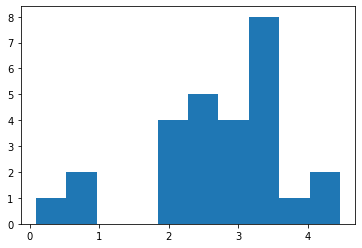

In [79]:
plt.hist(df4[df4['class'] == 'isoindoles and derivatives']['LogP'])

(array([1.000e+00, 0.000e+00, 4.000e+00, 1.700e+01, 3.920e+02, 3.785e+03,
        2.429e+03, 2.620e+02, 1.800e+01, 4.000e+00]),
 array([-15.2306 , -12.23116,  -9.23172,  -6.23228,  -3.23284,  -0.2334 ,
          2.76604,   5.76548,   8.76492,  11.76436,  14.7638 ]),
 <BarContainer object of 10 artists>)

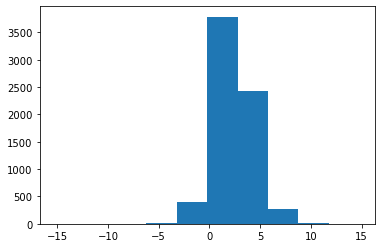

In [84]:
plt.hist(df4['LogP'])

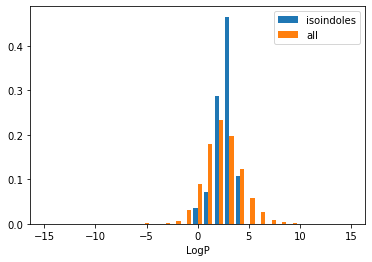

In [98]:

bins = np.linspace(-15, 15, 30)
x = df4[df4['class'] == 'isoindoles and derivatives']['LogP']
y = df4['LogP']
plt.hist([x, y], bins, label=['isoindoles', 'all'], density= True)
plt.hist
plt.legend()
plt.xlabel('LogP');

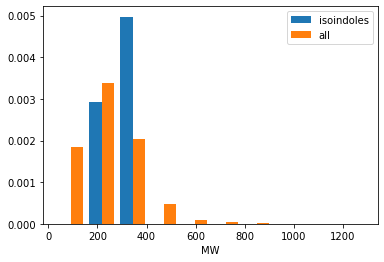

In [100]:
bins = np.linspace(-15, 15, 30)
x = df4[df4['class'] == 'isoindoles and derivatives']['MW']
y = df4['MW']
plt.hist([x, y], label=['isoindoles', 'all'], density= True)
plt.hist
plt.legend()
plt.xlabel('MW');

In [101]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x,y

In [117]:
def plug_in(X,  label = None):
    summary = {}
    summary['label'] = label
    summary['ecdf_x'], summary['ecdf_y'] = ecdf(X)
    return summary
    

In [118]:
mydict = {}
for i, group in df4.groupby('class'):
    mydict[i] = list(group['LogP'])

In [119]:
summaries = []
for k,v in mydict.items():
    if len(v)  >4:
        summaries.append(plug_in(mydict[k], label = k))

In [123]:
#summaries
all_x, all_y = ecdf(df4['LogP'])

In [140]:
for i in range(len(summaries)):
    print(i, summaries[i]['label'])

0 acyl halides
1 alkyl halides
2 allyl-type 1,3-dipolar organic compounds
3 anthracenes
4 anthracyclines
5 aryl halides
6 azepanes
7 azobenzenes
8 azoles
9 azolidines
10 azolines
11 benzazepines
12 benzene and substituted derivatives
13 benzimidazoles
14 benzodiazepines
15 benzodioxins
16 benzodioxoles
17 benzofurans
18 benzopyrans
19 benzopyrazoles
20 benzothiazines
21 benzothiazoles
22 benzothiophenes
23 benzothiopyrans
24 benzoxazoles
25 benzoxepines
26 carboximidic acids and derivatives
27 carboxylic acids and derivatives
28 cinnamaldehydes
29 cinnamic acids and derivatives
30 cinnamyl alcohols
31 coumarans
32 coumarins and derivatives
33 depsides and depsidones
34 diazanaphthalenes
35 diazinanes
36 diazines
37 dibenzocycloheptenes
38 dihydrofurans
39 dioxanes
40 dithiocarbamic acids and derivatives
41 epoxides
42 fatty acyls
43 flavonoids
44 fluorenes
45 furans
46 furofurans
47 glycerolipids
48 halohydrins
49 heteroaromatic compounds
50 hydroxy acids and derivatives
51 imidazopyri

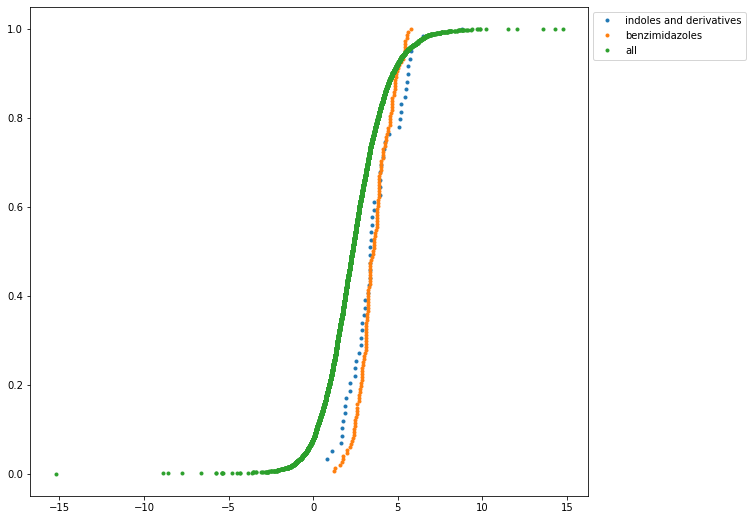

In [143]:
fig, ax = plt.subplots(figsize = (10,9))

ax.plot(summaries[54]['ecdf_x'],summaries[54]['ecdf_y'], marker = '.', linestyle = 'none', label = summaries[54]['label'])
ax.plot(summaries[13]['ecdf_x'],summaries[13]['ecdf_y'], marker = '.', linestyle = 'none', label = summaries[13]['label'])
ax.plot(all_x, all_y, marker = '.', linestyle = 'none', label = 'all')
ax.legend(bbox_to_anchor=(1, 1)) 
fig.savefig(figures_dir+'selected_ECDFs_logP.png', bbox_inches = 'tight');

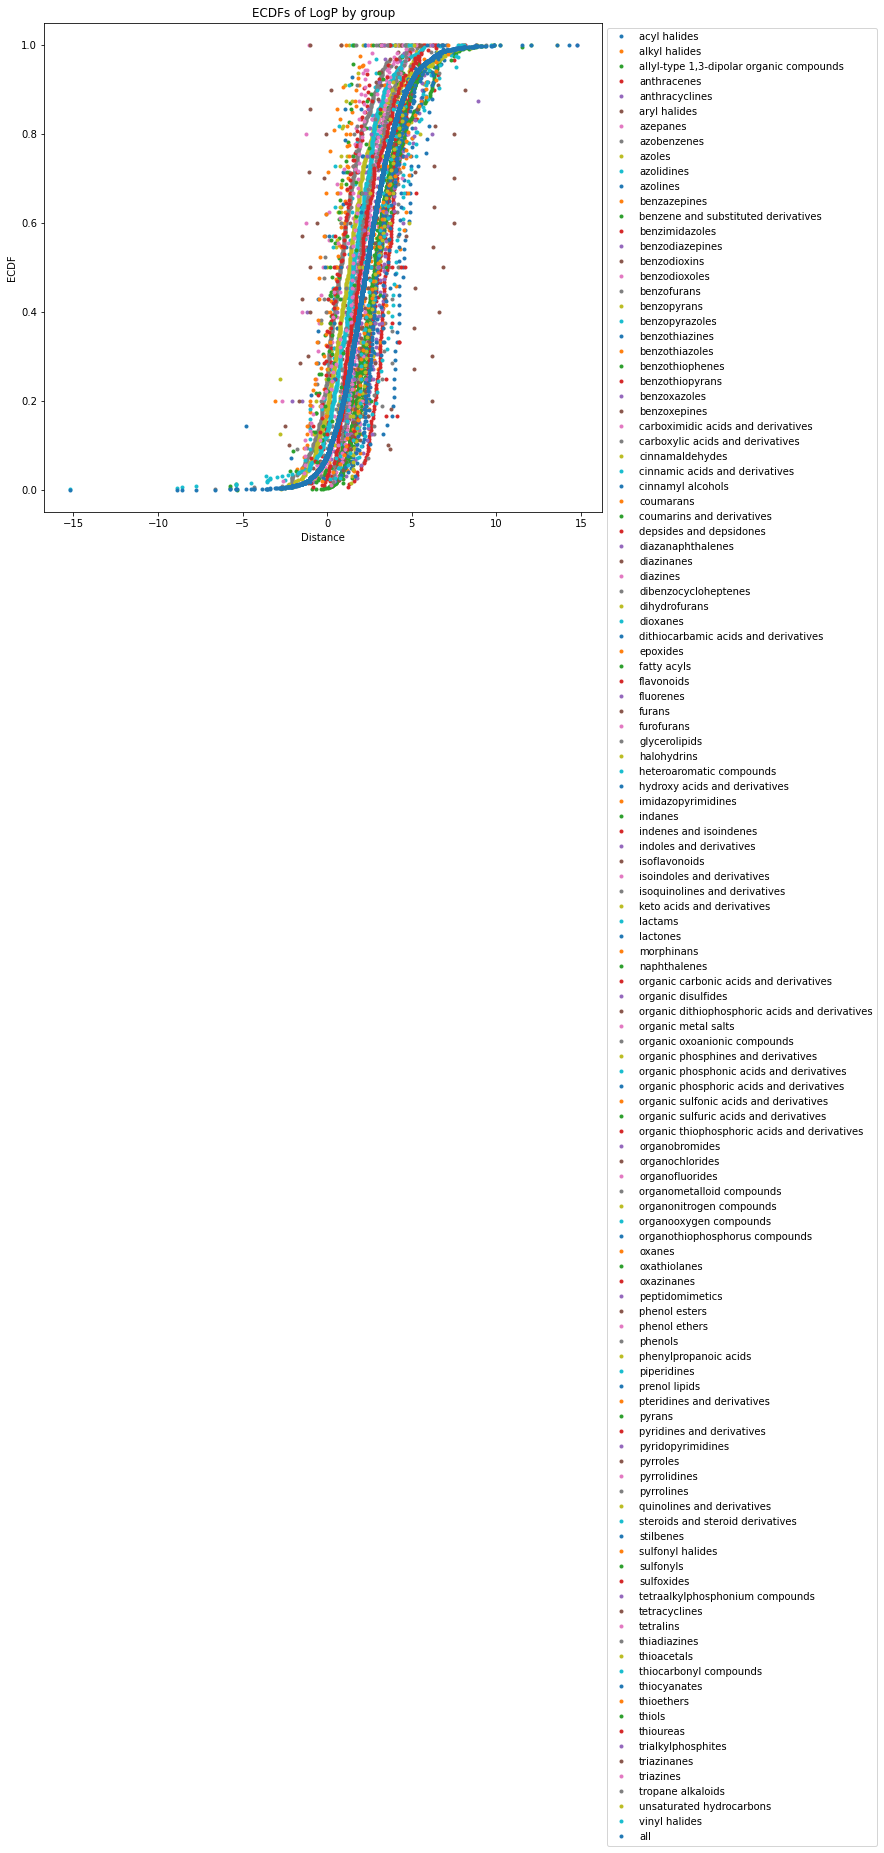

In [133]:
fig, ax = plt.subplots(figsize = (10,9))
for i,x in enumerate(range(len(summaries))):
        ax.set_xlabel('Distance')
        ax.set_ylabel('ECDF')
        ax.set_title('ECDFs of LogP by group')
        ax.plot(summaries[i]['ecdf_x'],summaries[i]['ecdf_y'], marker = '.', linestyle = 'none', label = summaries[i]['label'])
ax.plot(all_x, all_y, marker = '.', linestyle = 'none', label = 'all')
ax.legend(bbox_to_anchor=(1, 1)) 
fig.savefig(figures_dir+'ECDFs_logP.png', bbox_inches = 'tight');

Text(0, 0.5, 'Y_pred')

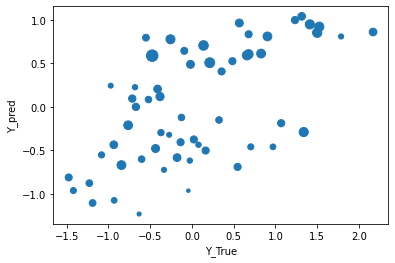

In [195]:
#f, ax = plt.subplots()


ax = df4[df4['class'] == 'indoles and derivatives'].plot(kind = 'scatter', x = 'Y_true', y = 'Y_pred_tox', s=df4[df4['class'] == 'indoles and derivatives']['LogP']*15)
#ax.set_xlabel('YTrue')
ax.set_xlabel("Y_True")
ax.set_ylabel("Y_pred")




Text(0, 0.5, 'Y_pred')

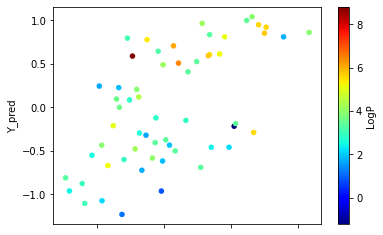

In [196]:
ax = df4[df4['class'] == 'indoles and derivatives'].plot(kind = 'scatter', x = 'Y_true', y = 'Y_pred_tox', c='LogP', cmap = 'jet')
#ax.set_xlabel('YTrue')
ax.set_xlabel("Y_True")
ax.set_ylabel("Y_pred")